# AIST1100 2020-21 Term 1 Project

In [ ]:
!pip install tensorflow-datasets
#!pip install -q tfds-nightly

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
# add modules you need

## Image Classifier Code

In [ ]:
def preprocess(ds, img_height, img_width, batch_size = 32, shuffle=True):
    """ a dataset wrapper that resizes images """
    # resize images as the specified height and width
    
    # provide images as batches and enable prefetching (and shuffling)
    

In [ ]:
class ImageClassifier:
    def __init__(self, train_ds, test_ds, metadata, 
                 img_height, img_width, img_depth=3, batch_size=32, 
                 shuffle=True, augment=False, dropout=False):
        self.img_height = img_height
        self.img_width = img_width
        self.img_depth = img_depth
        self.metadata = metadata
        self.batch_size = batch_size

        # Preprocess data sources
        self.train_ds = train_ds
        self.test_ds = test_ds
        self.train_pds = preprocess(train_ds, img_height, img_width, 
                                    batch_size, shuffle)
        self.test_pds = preprocess(test_ds, img_height, img_width, 
                                   batch_size, shuffle)

        # Create and compile the model
        # model = ...

        self.model = model
        self.history = None
        
    def train(self, epochs=15):
        # fit the model
        # history = ...
        self.history = history
        self.epochs = epochs

    def plot_learning_curve(self):
        if self.history == None:
            print("Train the model first!")
            return
        
        # Create a figure with two subsplots
        # (one is accuracy; another is loss)
        # ...
        plt.show()
    
    def evaluate(self, test_ds=None):
        print("Evaluation:")
        if test_ds == None:
            test_ds = self.test_pds
        result = self.model.evaluate(test_ds)
        print(dict(zip(self.model.metrics_names, result)))

    def print_confusion_matrix(self, test_ds=None, alt_label=False):
        print("Confusion matrix:")
        if test_ds == None:
            test_ds = self.test_pds
        
        if alt_label == True:
            class_names = self.metadata.features["label"].alt_names
        else:
            class_names = self.metadata.features["label"].names
        
        # Create a heatmap of the confusion matrix from the test dataset
        # ...
        plt.show()
    
    def query(self, path, alt_label=False):
        img = tf.keras.preprocessing.image.load_img(
            path, target_size=(self.img_height, self.img_width)
        )
        img_array = tf.keras.preprocessing.image.img_to_array(img, 
                                                              dtype=np.uint8)
        # make prediction on the image
        # ...
        print(
            "This image most likely belongs to {} with a {:.2f} percent confidence."
            .format(label, confidence)
        )
        return (img_array, label)
    
    def find_similar(self, path, no_of_images=5, alt_label=False, 
                     search_bound=1000, tolerance = 50):
        
        # call query() to get the image array and predicted label 
        # of the input image file

        # Calculate the average color [r, g, b] of the input image
        
        # Show the image with title showing average RGB values
        # (Turn off the display of x- and y- axis)
        
        print('Similar images:')
        # Scan the original dataset for images that match with the queried
        # image in terms of label class and average color values
        
        # if not found
            print('No similar images found!')


## Client Code

### Imagenette

train: 9469
test:  3925


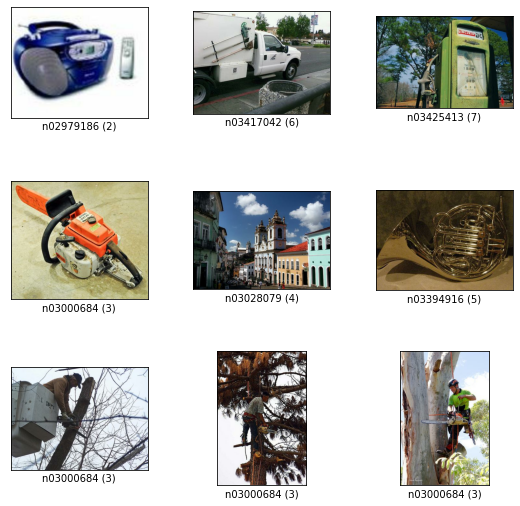

['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


In [ ]:
# create training and testing datasets
(train_ds, test_ds), metadata = tfds.load( 
    'imagenette/320px-v2',
    split=['train', 'validation'],
    with_info=True,
    as_supervised=True,
)
print("train:", len(train_ds))
print("test: ", len(test_ds))
fig = tfds.show_examples(train_ds, metadata)
print(metadata.features["label"].names)
# ['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 
#  'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']
# add alternative names for labels
metadata.features["label"].alt_names = [
    'tench', 'English springer', 'cassette player', 'chain saw', 'church', 
    'French horn', 'garbage truck', 'gas pump', 'golf ball', 'parachute'
    ]

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 22, 22, 64)      

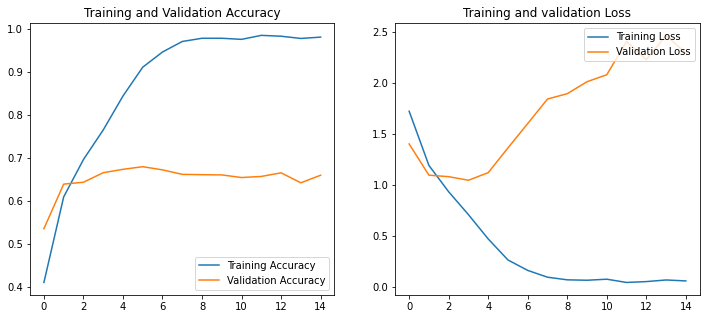

Evaluation:
123/123 [==============================] - 5s 38ms/step - loss: 2.2905 - accuracy: 0.6601
{'loss': 2.2904560565948486, 'accuracy': 0.6601274013519287}
Confusion matrix:


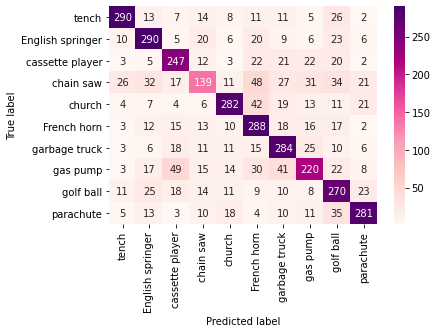

In [ ]:
# client code for testing
IMG_SIZE = 180
imagenette = ImageClassifier(train_ds, test_ds, metadata, IMG_SIZE, IMG_SIZE, 
                             augment=False, dropout=False)
imagenette.train(epochs=15)
imagenette.plot_learning_curve()
imagenette.evaluate()
imagenette.print_confusion_matrix(alt_label=True)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_28 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_7 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 45, 45, 64)      

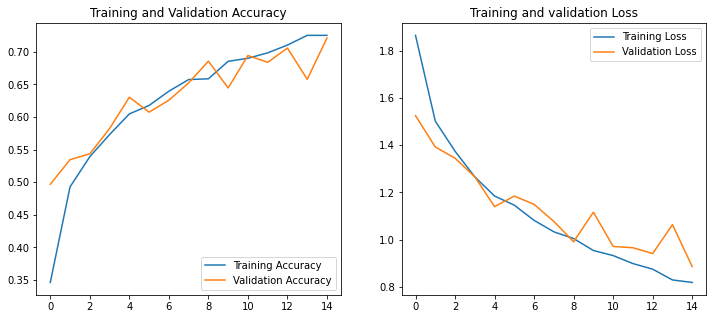

Evaluation:
123/123 [==============================] - 5s 38ms/step - loss: 0.8853 - accuracy: 0.7210
{'loss': 0.8852530121803284, 'accuracy': 0.7210190892219543}
Confusion matrix:


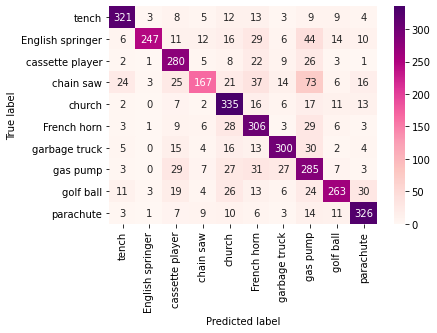

In [ ]:
# test effectiveness of data augmentation and dropout
IMG_SIZE = 180
imagenette = ImageClassifier(train_ds, test_ds, metadata, IMG_SIZE, IMG_SIZE, 
                             augment=True, dropout=True)
imagenette.train(epochs=15)
imagenette.plot_learning_curve()
imagenette.evaluate()
imagenette.print_confusion_matrix(alt_label=True)

This image most likely belongs to golf ball with a 87.16 percent confidence.
This image most likely belongs to golf ball with a 90.36 percent confidence.
This image most likely belongs to parachute with a 100.00 percent confidence.
This image most likely belongs to parachute with a 100.00 percent confidence.
This image most likely belongs to parachute with a 91.65 percent confidence.
Finding similar figures:
This image most likely belongs to golf ball with a 87.16 percent confidence.


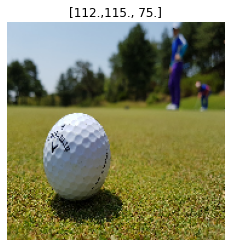

Similar images:


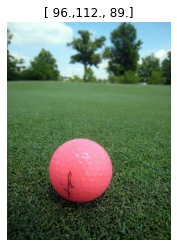

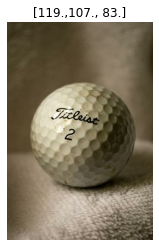

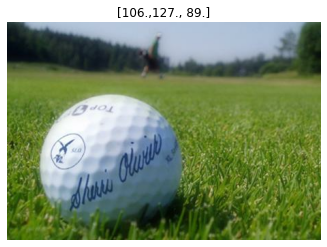

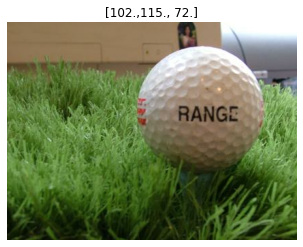

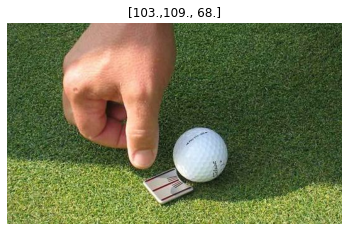

This image most likely belongs to parachute with a 100.00 percent confidence.


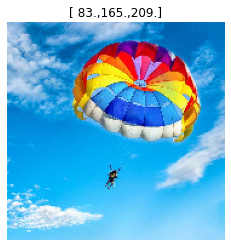

Similar images:


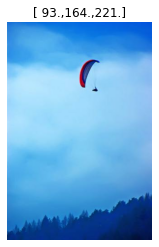

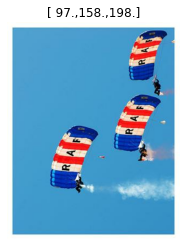

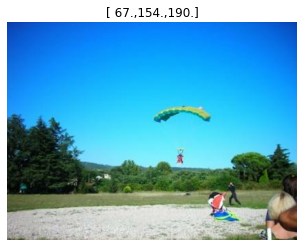

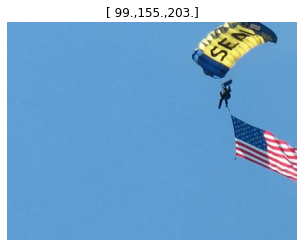

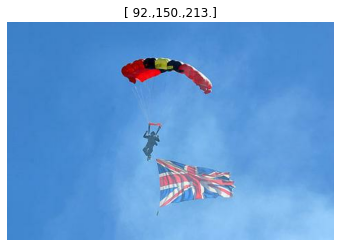

In [ ]:
# make some predictions
URL = 'https://upload.wikimedia.org/wikipedia/commons/e/ef/Golf_ball_near_green.jpg'
golf_path1 = tf.keras.utils.get_file('golfball1.jpg', origin=URL)
imagenette.query(golf_path1, alt_label=True)

URL = 'https://contents.mediadecathlon.com/p1345747/k$8bfca050583b3bfb22ace6db8769f696/bong-golf-inesis-100-x12-trang.jpg?format=auto&f=700x700'
golf_path2 = tf.keras.utils.get_file('golfball2.jpg', origin=URL)
imagenette.query(golf_path2, alt_label=True)

URL = 'https://cdn.techexplorist.com/wp-content/uploads/2018/12/parachute.jpg'
parachute_path1 = tf.keras.utils.get_file('parachute1.jpg', origin=URL)
imagenette.query(parachute_path1, alt_label=True)

URL = 'https://media.npr.org/assets/img/2018/12/21/parachute_custom-14f30a9f6c9cd40ce0c2079732f3cf6122206945-s800-c85.jpg'
parachute_path2 = tf.keras.utils.get_file('parachute2.jpg', origin=URL)
imagenette.query(parachute_path2, alt_label=True)

URL = 'https://spacenews.com/wp-content/uploads/2019/12/spacexchutes-dec19.jpg'
parachute_path3 = tf.keras.utils.get_file('parachute3.jpg', origin=URL)
imagenette.query(parachute_path3, alt_label=True)

print("Finding similar figures:")
imagenette.find_similar(golf_path1, 5, alt_label=True, tolerance=20, search_bound=2000)
imagenette.find_similar(parachute_path1, 5, alt_label=True, tolerance=20, search_bound=3000)


### Cats vs. Dogs

train: 11631
test:  2326


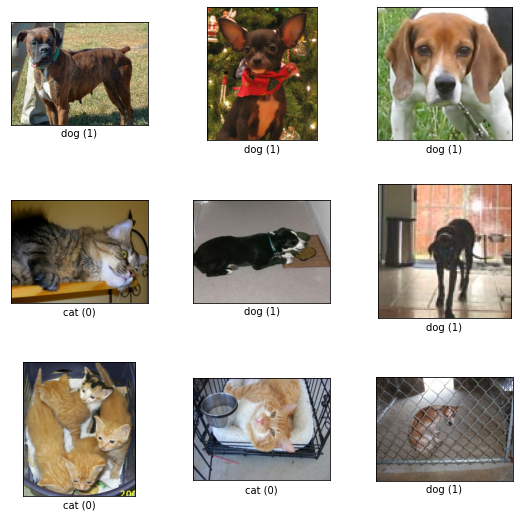

['cat', 'dog']


In [ ]:
# create training and testing datasets
(train_ds, test_ds), metadata = tfds.load( 
    'cats_vs_dogs',
    split=['train[:50%]', 'train[:10%]'],
    with_info=True,
    as_supervised=True,
)

print("train:", len(train_ds))
print("test: ", len(test_ds))
fig = tfds.show_examples(train_ds, metadata)
print(metadata.features["label"].names)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_32 (Sequential)   (None, 150, 150, 3)       0         
_________________________________________________________________
rescaling_8 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 37, 37, 64)      

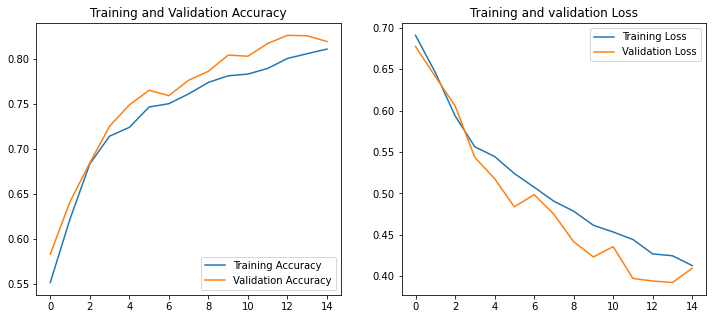

Evaluation:
73/73 [==============================] - 2s 30ms/step - loss: 0.4096 - accuracy: 0.8194
{'loss': 0.4095933139324188, 'accuracy': 0.8194324970245361}
Confusion matrix:


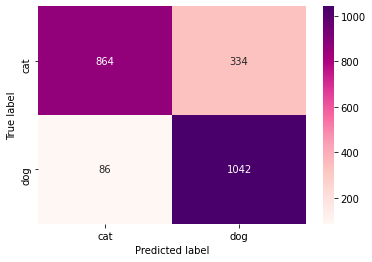

In [ ]:
# client code for testing
IMG_SIZE = 150
cats_vs_dogs = ImageClassifier(train_ds, test_ds, metadata, IMG_SIZE, IMG_SIZE, 
                               augment=True, dropout=True)
cats_vs_dogs.train(epochs=15)
cats_vs_dogs.plot_learning_curve()
cats_vs_dogs.evaluate()
cats_vs_dogs.print_confusion_matrix()

This image most likely belongs to dog with a 100.00 percent confidence.
This image most likely belongs to dog with a 87.17 percent confidence.
This image most likely belongs to dog with a 86.99 percent confidence.
This image most likely belongs to dog with a 100.00 percent confidence.


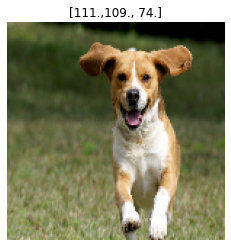

Similar images:


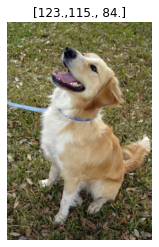

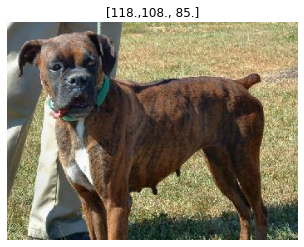

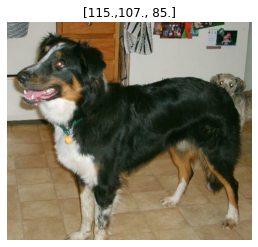

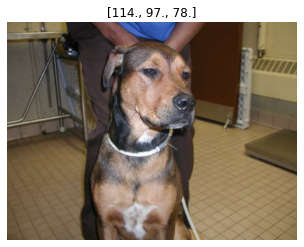

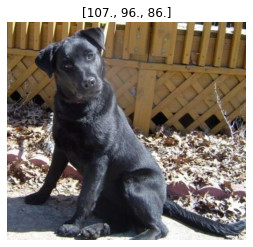

This image most likely belongs to dog with a 87.17 percent confidence.


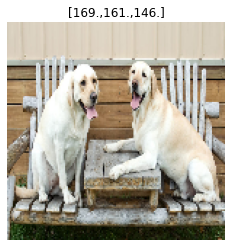

Similar images:


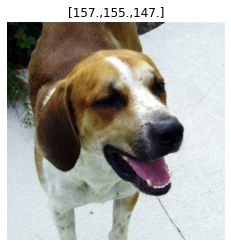

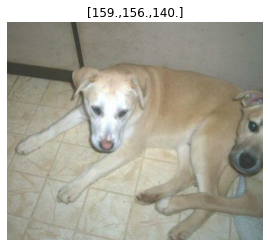

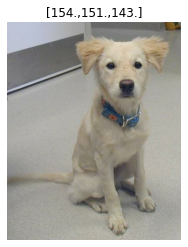

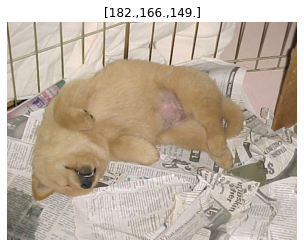

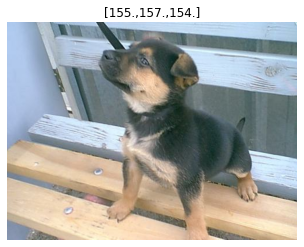

This image most likely belongs to dog with a 86.99 percent confidence.


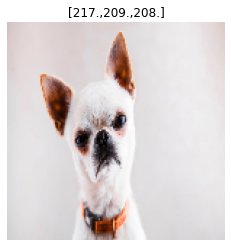

Similar images:
No similar images found!


In [ ]:
# make some predictions
URL = 'https://i.insider.com/5484d9d1eab8ea3017b17e29?width=600&format=jpeg&auto=webp'
dog_path1 = tf.keras.utils.get_file('dog1', origin=URL)
cats_vs_dogs.query(dog_path1)

URL = 'https://www.sciencenewsforstudents.org/wp-content/uploads/2020/07/070720_bo_dogage_feat-1028x579.jpg'
dog_path2 = tf.keras.utils.get_file('dog2', origin=URL)
cats_vs_dogs.query(dog_path2)

URL = 'https://images.theconversation.com/files/319652/original/file-20200310-61148-vllmgm.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=754&fit=clip'
dog_path3 = tf.keras.utils.get_file('dog3', origin=URL)
cats_vs_dogs.query(dog_path3)

cats_vs_dogs.find_similar(dog_path1, 5, tolerance=15)
cats_vs_dogs.find_similar(dog_path2, 5, tolerance=15)
cats_vs_dogs.find_similar(dog_path3, 5, tolerance=15)


### Other Dataset Experiments

In [ ]:
# Add any other dataset experiments you may want to include (at least one)